In [1]:
%matplotlib notebook

import numpy as np
import toolz
import matplotlib.pyplot as plt

## Frequency response

Implicitly plot the function

\begin{align}
\frac{\gamma^2}{z^2} &= (\omega^2 - \alpha - \frac{3}{4}\beta z^2)^2 + (\delta \omega)^2 \implies \\
z &= \frac{\gamma}{\sqrt{(\omega^2 - \alpha - \frac{3}{4}\beta z^2)^2 + (\delta \omega)^2}} \implies
\end{align}


In [2]:
def right(gamma, alpha, beta, delta, z, omega):
    denom = (omega**2 - alpha - (3/4)*beta*z**2)**2 + (delta*omega)**2
    return gamma/np.sqrt(denom)

<IPython.core.display.Javascript object>


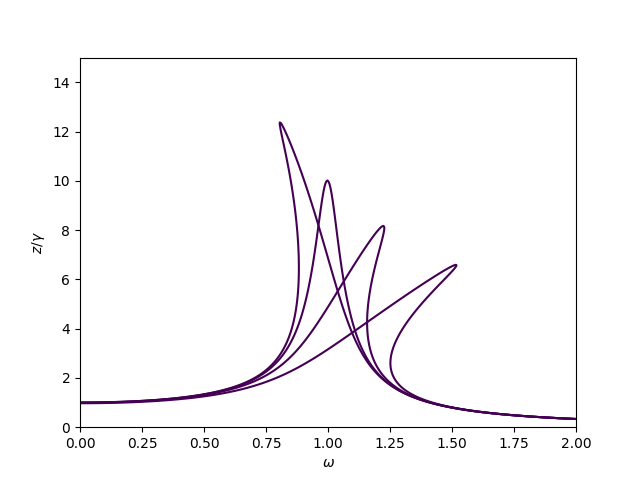

In [3]:
gamma = 1
alpha = 1
beta_mul = 0.01
delta = 0.1

z, omega = np.meshgrid(
    np.linspace(0, 15, 500),
    np.linspace(0, 2, 500)
)

plt.figure()
for beta in (-0.3, 0.0, 1, 4):
    G = right(gamma, alpha, beta*beta_mul, delta, z, omega)
    plt.contour(omega, z, (z-G), [0])
    plt.xlabel("$\omega$")
    plt.ylabel("$z/\gamma$")

<IPython.core.display.Javascript object>


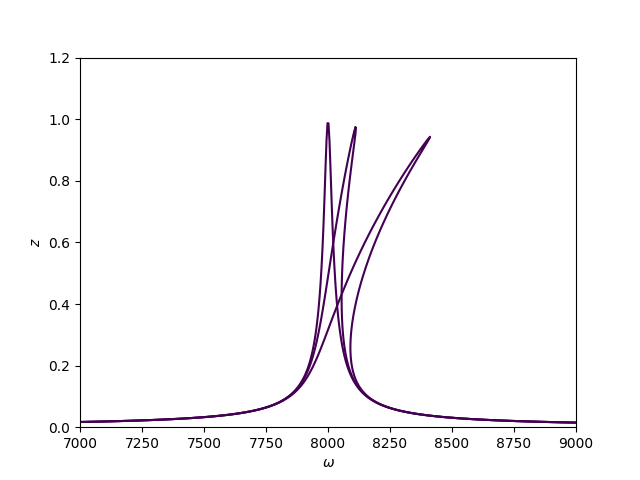

In [5]:
def right(gamma, alpha, beta, delta, z, f):
    omega = 2*np.pi*f
    denom = (omega**2 - alpha - (3/4)*beta*z**2)**2 + (delta*omega)**2
    return gamma/np.sqrt(denom)

f_resonance = 8e3
omega_resonance = 2*np.pi*f_resonance

gamma = 1e7
alpha = omega_resonance**2
beta_mul = 1e8
delta = 200

z, fs = np.meshgrid(
    np.linspace(0, 1.2, 500),
    np.linspace(7e3, 9e3, 500)
)

plt.figure()
for beta in (0.0, 1, 4):
    G = right(gamma, alpha, beta*beta_mul, delta, z, fs)
    plt.contour(fs, z, (z-G), [0])
    plt.xlabel("$\omega$")
    plt.ylabel("$z$")

In [98]:
from scipy.stats import skew
from scipy.interpolate import interp1d

def get_pointmap(gamma, alpha, beta, delta, z, f):
    fig = plt.figure()
    G = right(gamma, alpha, beta, delta, z, f)
    cs = plt.contour(f, z, (z-G), [0])
    p = cs.collections[0].get_paths()[0]
    v = p.vertices
    plt.close(fig)
    return v[:,0][::-1], v[:,1][::-1]

def clip_pointmap(xs, ys):
    # If softening spring, mirror the distribution across 0 and back
    if skew(xs) > 0:
        # Is order/direction different when softening?
        raise NotImplementedError()
        _xs, _ys = clip_pointmap(-1*xs, ys)
        return -1*_xs, _ys
    
    # Find peak and continue s.t. x is monotonically increasing
    indexes = []
    N = len(xs)
    max_x = xs[0] - 1e-9
    for i in range(0, N):
        if xs[i] > max_x:
            indexes.append(i)
            max_x = xs[i]
    return xs[indexes], ys[indexes]

def resample_pointmap(xs, ys, n):
    lin = interp1d(xs, ys)
    new_xs = np.linspace(xs[0], xs[-1], n)
    return new_xs, lin(new_xs)

Original
1357
1357
-0.38797704316103915
695


<IPython.core.display.Javascript object>


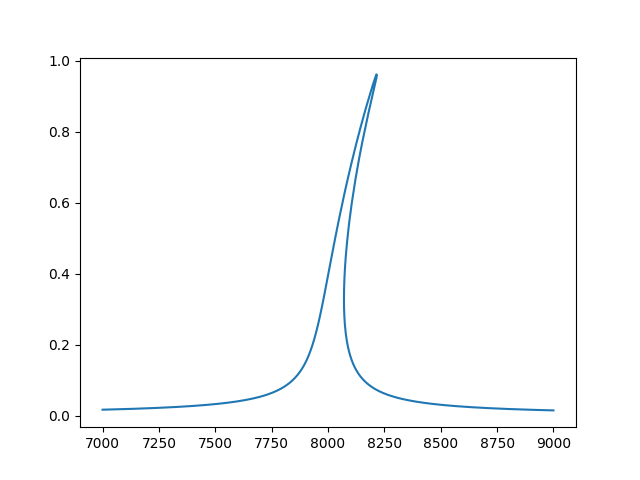

Clipped
917
917


<IPython.core.display.Javascript object>


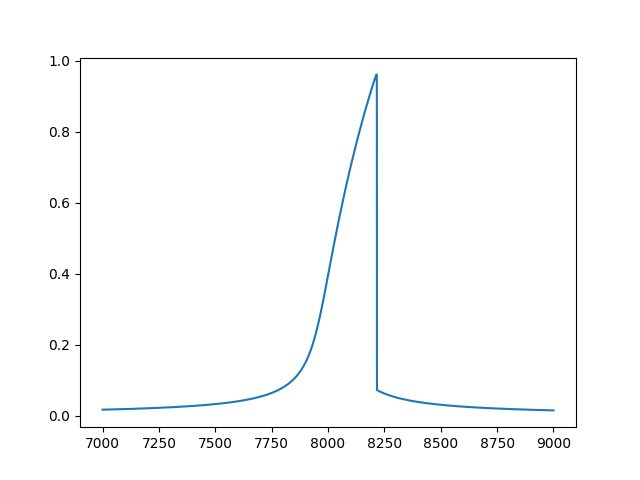

Resampled
100
100


<IPython.core.display.Javascript object>


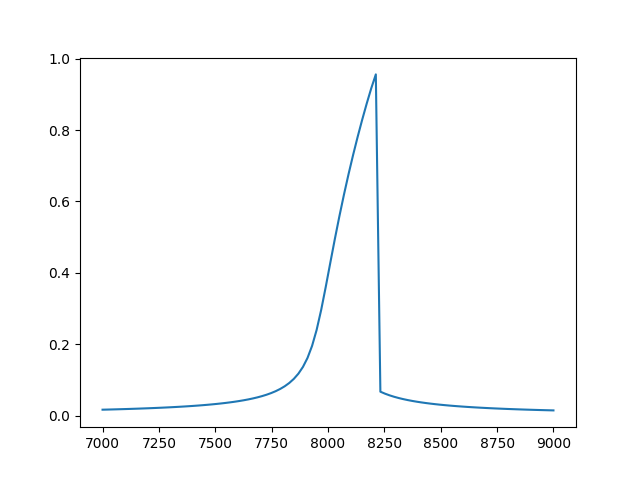

In [100]:
f_resonance = 8e3
omega_resonance = 2*np.pi*f_resonance

gamma = 1e7
alpha = omega_resonance**2
beta = 2e8
delta = 200

zs, fs = np.meshgrid(
    np.linspace(0, 1.2, 500),
    np.linspace(7e3, 9e3, 500)
)

plt.ioff()
xs, ys = get_pointmap(gamma, alpha, beta, delta, zs, fs)
plt.ion()

print("Original")
print(len(xs))
print(len(ys))
print(skew(xs[::-1]))
print(np.argmax(ys))
plt.figure()
plt.plot(xs, ys)

xs, ys = clip_pointmap(xs, ys)
print("Clipped")
print(len(xs))
print(len(ys))
plt.figure()
plt.plot(xs, ys)

xs, ys = resample_pointmap(xs, ys, 100)
print("Resampled")
print(len(xs))
print(len(ys))
plt.figure()
plt.plot(xs, ys)

## Rough method

#### Simulating frequency response -- no coupling

 1. Calculate linear stiffness $\alpha$ from resonance frequencies.
 2. Derive slope and half-width maximum by search on $\beta$ and $\delta$. Scale signals and apply MSE loss function.
 3. Finally, scale amplitude by the inverse of scaling factor in 2).
 
Step 3) outputs ballpark parameters for frequency scan simulations. See other notebook for coupling and further optimization.